# Paso 1: Exploración inicial de los datos

Antes de construir el modelo, primero necesitamos entender la estructura y calidad de los datos. Vamos a cargar los datasets proporcionados.
Explorar las primeras filas y obtener información general (dimensiones, tipos de datos, valores nulos, distribución de la variable respuesta).
Verificar cómo se distribuye la variable objetivo

In [117]:
import pandas as pd

In [118]:
# Ruta del archivo
file_path = "data/prueba_op_base_pivot_var_rpta_alt_enmascarado_trtest.csv"

# Cargar el dataset
df_base_pivot = pd.read_csv(file_path)

# Mostrar información general del dataset
df_info = df_base_pivot.info()
df_head = df_base_pivot.head()

# Ver distribución de la variable respuesta
var_rpta_alt_distribution = df_base_pivot['var_rpta_alt'].value_counts(normalize=True)

df_info, df_head, var_rpta_alt_distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568251 entries, 0 to 568250
Data columns (total 49 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   nit_enmascarado                  568251 non-null  int64  
 1   num_oblig_orig_enmascarado       568251 non-null  int64  
 2   num_oblig_enmascarado            568251 non-null  int64  
 3   fecha_var_rpta_alt               568251 non-null  int64  
 4   var_rpta_alt                     568251 non-null  int64  
 5   tipo_var_rpta_alt                568251 non-null  object 
 6   banca                            568251 non-null  object 
 7   segmento                         568251 non-null  object 
 8   producto                         568251 non-null  object 
 9   producto_cons                    568251 non-null  object 
 10  aplicativo                       568251 non-null  object 
 11  min_mora                         568251 non-null  int64  
 12  ma

(None,
    nit_enmascarado  num_oblig_orig_enmascarado  num_oblig_enmascarado  \
 0           630611                      219718                 863073   
 1            59412                      789567                 290775   
 2           277595                     1045909                  34433   
 3            26897                      585786                 494556   
 4            24588                     1061389                  18953   
 
    fecha_var_rpta_alt  var_rpta_alt tipo_var_rpta_alt           banca  \
 0              202308             1      a_uno_tipo_1  Banca Personas   
 1              202312             1      a_uno_tipo_1  Banca Personas   
 2              202312             1      b_uno_tipo_2  Banca Personas   
 3              202311             1      a_uno_tipo_1  Banca Personas   
 4              202311             1      b_uno_tipo_2  Banca Personas   
 
         segmento            producto       producto_cons  ... porc_pago_cuota  \
 0       Personal  

In [91]:
# Seleccionar solo las columnas necesarias
df_base_pivot = df_base_pivot[["nit_enmascarado", "num_oblig_orig_enmascarado", "num_oblig_enmascarado", "fecha_var_rpta_alt", "var_rpta_alt"]]

# Mostrar las primeras filas después de la selección
df_base_pivot.head()

,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt
0,630611,219718,863073,202308,1
1,59412,789567,290775,202312,1
2,277595,1045909,34433,202312,1
3,26897,585786,494556,202311,1
4,24588,1061389,18953,202311,1


In [92]:
# Ruta del nuevo archivo con filas adicionales
file_path_new = "data/prueba_op_base_pivot_var_rpta_alt_enmascarado_oot.csv"

# Cargar el nuevo dataset con filas adicionales
df_new_rows = pd.read_csv(file_path_new)

# Unir los dos datasets
df_base_pivot = pd.concat([df_base_pivot, df_new_rows], ignore_index=True)

# Mostrar las primeras filas después de la actualización
df_base_pivot


,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt
0,630611,219718,863073,202308,1.0
1,59412,789567,290775,202312,1.0
2,277595,1045909,34433,202312,1.0
3,26897,585786,494556,202311,1.0
4,24588,1061389,18953,202311,1.0
...,...,...,...,...,...
680795,316499,14503,1074624,202401,NaN
680796,254311,30479,1013957,202401,NaN
680797,483193,13732,1006779,202401,NaN
680798,293824,22004,1062743,202401,NaN


In [93]:
# Crear la columna ID concatenando las columnas requeridas con el carácter "#"
df_base_pivot["ID"] = df_base_pivot["nit_enmascarado"].astype(str) + "#" + \
                      df_base_pivot["num_oblig_orig_enmascarado"].astype(str) + "#" + \
                      df_base_pivot["num_oblig_enmascarado"].astype(str)

# Reordenar las columnas para que ID sea la primera
column_order = ["ID"] + [col for col in df_base_pivot.columns if col != "ID"]
df_base_pivot = df_base_pivot[column_order]

# Mostrar las primeras filas con la nueva columna en primer lugar
df_base_pivot



,ID,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt
0,630611#219718#863073,630611,219718,863073,202308,1.0
1,59412#789567#290775,59412,789567,290775,202312,1.0
2,277595#1045909#34433,277595,1045909,34433,202312,1.0
3,26897#585786#494556,26897,585786,494556,202311,1.0
4,24588#1061389#18953,24588,1061389,18953,202311,1.0
...,...,...,...,...,...,...
680795,316499#14503#1074624,316499,14503,1074624,202401,NaN
680796,254311#30479#1013957,254311,30479,1013957,202401,NaN
680797,483193#13732#1006779,483193,13732,1006779,202401,NaN
680798,293824#22004#1062743,293824,22004,1062743,202401,NaN


Vamos a analizar la distribución temporal de la variable respuesta 

<Figure size 1000x500 with 0 Axes>

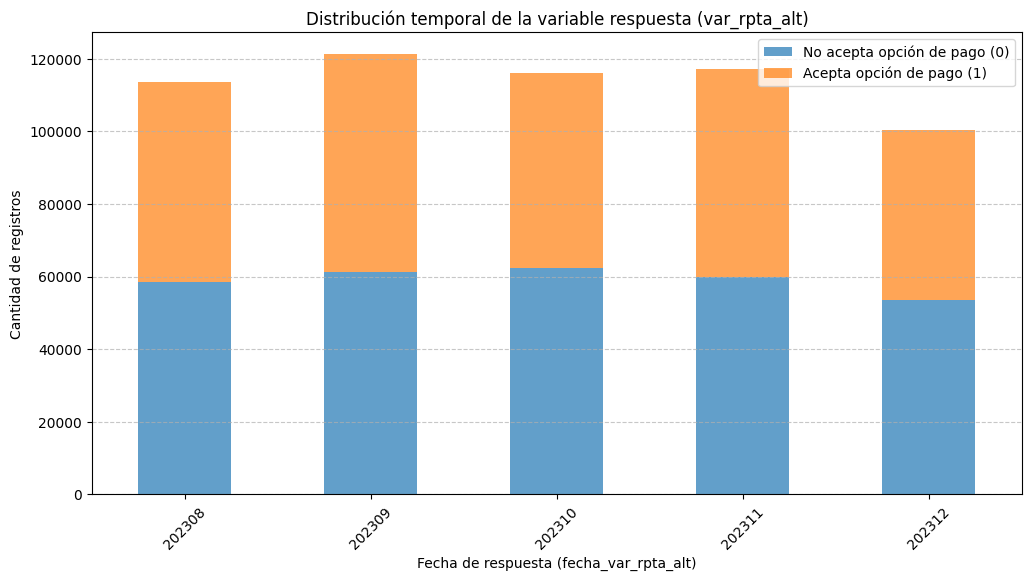

In [94]:
import matplotlib.pyplot as plt

# Contar la cantidad de 0s y 1s por fecha
df_temporal_dist = df_base_pivot.groupby("fecha_var_rpta_alt")["var_rpta_alt"].value_counts().unstack()

# Graficar la distribución
plt.figure(figsize=(10, 5))
df_temporal_dist.plot(kind="bar", stacked=True, figsize=(12, 6), alpha=0.7)
plt.title("Distribución temporal de la variable respuesta (var_rpta_alt)")
plt.xlabel("Fecha de respuesta (fecha_var_rpta_alt)")
plt.ylabel("Cantidad de registros")
plt.xticks(rotation=45)
plt.legend(["No acepta opción de pago (0)", "Acepta opción de pago (1)"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


El balance de la variable respuesta varía mes a mes, pero en general, no está completamente desbalanceado.
- No hay un dominio absoluto de una clase sobre la otra: Aunque hay meses donde la cantidad de clientes que no aceptaron (0) es mayor que los que aceptaron (1), la diferencia no es extrema.
- Algunos meses tienen más aceptación que otros: En ciertos periodos, la cantidad de clientes que aceptaron (1) es bastante significativa en comparación con los que no lo hicieron (0). Esto sugiere que hay factores externos o de negocio que afectan la decisión de aceptar una opción de pago.
Consideración para el modelo: Si bien el dataset no está completamente desbalanceado, en algunos meses sí hay una diferencia notable entre clases.
- Dependiendo de cómo se dividan los datos de entrenamiento y prueba, podríamos necesitar técnicas como reescalado de clases (oversampling o undersampling) para mejorar el rendimiento del modelo.

In [95]:
# Ruta del archivo
file_path_probabilidad = "data/prueba_op_probabilidad_oblig_base_hist_enmascarado_completa.csv"

# Cargar el dataset
df_probabilidad = pd.read_csv(file_path_probabilidad)

# Mostrar información general del dataset
df_probabilidad_info = df_probabilidad.info()
df_probabilidad_head = df_probabilidad.head()

# Ver distribución de las probabilidades
prob_columns = ["prob_propension", "prob_alrt_temprana", "prob_auto_cura"]
df_probabilidad_describe = df_probabilidad[prob_columns].describe()

df_probabilidad_info, df_probabilidad_head, df_probabilidad_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804836 entries, 0 to 4804835
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   nit_enmascarado        int64  
 1   num_oblig_enmascarado  int64  
 2   fecha_corte            int64  
 3   lote                   int64  
 4   prob_propension        float64
 5   prob_alrt_temprana     float64
 6   prob_auto_cura         float64
dtypes: float64(3), int64(4)
memory usage: 256.6 MB


(None,
    nit_enmascarado  num_oblig_enmascarado  fecha_corte  lote  prob_propension  \
 0           296482                 102381       202308     1         0.761350   
 1           391957                 742315       202310     2         0.741803   
 2           229894                 359919       202307     1         0.835373   
 3           478963                 239064       202303     3         0.445002   
 4           349609                 923348       202308     2         0.784365   
 
    prob_alrt_temprana  prob_auto_cura  
 0            0.193744        0.684784  
 1            0.384184        0.483696  
 2            0.285157        0.826225  
 3            0.629652        0.346508  
 4            0.419123        0.667603  ,
        prob_propension  prob_alrt_temprana  prob_auto_cura
 count     4.804836e+06        4.804829e+06    4.804829e+06
 mean      7.002381e-01        4.349893e-01    4.877742e-01
 std       2.140671e-01        2.277477e-01    2.501165e-01
 min       3

In [96]:
# Filtrar solo los registros con fecha_corte menor o igual a fecha_var_rpta_alt - 1
df_probabilidad_filtered = df_probabilidad.copy()

# Hacer el merge con múltiples fechas posibles
df_temp_merge = df_base_pivot.merge(
    df_probabilidad_filtered,
    on=["nit_enmascarado", "num_oblig_enmascarado"],
    how="left"
)

# Filtrar para tomar solo la fecha más reciente menor o igual a fecha_var_rpta_alt - 1
df_temp_merge = df_temp_merge[df_temp_merge["fecha_corte"] <= df_temp_merge["fecha_var_rpta_alt"] - 1]

# Mantener solo la última fecha disponible para cada cliente-obligación
df_final_merge = df_temp_merge.loc[df_temp_merge.groupby(["nit_enmascarado", "num_oblig_enmascarado", "fecha_var_rpta_alt"])["fecha_corte"].idxmax()]

# Convertir `fecha_corte` a `int64`
df_final_merge["fecha_corte"] = df_final_merge["fecha_corte"].astype(int)
df_final_merge["lote"] = df_final_merge["lote"].astype(int)

# Mostrar los tipos de datos actualizados
df_final_merge.dtypes


# Mostrar el resultado
df_final_merge.info



<bound method DataFrame.info of                            ID  nit_enmascarado  num_oblig_orig_enmascarado  \
3971518       1#975854#104488                1                      975854   
1247832       2#389854#690004                2                      389854   
2789192       5#458725#621619                5                      458725   
1309522      12#623302#457040               12                      623302   
7007983      12#623302#457040               12                      623302   
...                       ...              ...                         ...   
6319960  634695#173880#914235           634695                      173880   
647791   634700#719569#360773           634700                      719569   
2167141  634701#480904#599438           634701                      480904   
252363   634707#133499#954483           634707                      133499   
1535321  634709#303030#780082           634709                      303030   

         num_oblig_enmascarado 

La técnica que usamos para el cruce se basa en el concepto de "última observación válida" (Last Observation Carried Forward - LOCF). Es una estrategia comúnmente utilizada en análisis de series temporales y en la preparación de datos históricos para modelos predictivos.

- Evita la pérdida de datos
- Aprovecha al máximo el historial
- Reduce los valores nulos
- Más representativo del comportamiento del cliente

In [97]:
# Ruta del archivo
file_path_master_customer = "data/prueba_op_master_customer_data_enmascarado_completa.csv"

# Cargar el dataset
df_master_customer = pd.read_csv(file_path_master_customer)

# Mostrar información general del dataset
df_master_customer_info = df_master_customer.info()
df_master_customer_head = df_master_customer.head()

# Revisar valores nulos
df_master_customer_nulls = df_master_customer.isnull().sum()

(df_master_customer_info, df_master_customer_head, df_master_customer_nulls)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430000 entries, 0 to 429999
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   nit_enmascarado        430000 non-null  int64  
 1   cod_tipo_doc           430000 non-null  int64  
 2   tipo_cli               430000 non-null  object 
 3   ctrl_terc              430000 non-null  object 
 4   genero_cli             422038 non-null  object 
 5   ano_nac_cli            422058 non-null  float64
 6   edad_cli               422058 non-null  float64
 7   estado_civil           393526 non-null  object 
 8   tipo_vivienda          135123 non-null  object 
 9   num_hijos              422058 non-null  float64
 10  personas_dependientes  422055 non-null  float64
 11  nivel_academico        184998 non-null  object 
 12  ocup                   406747 non-null  object 
 13  act_econom             398632 non-null  object 
 14  sector                 396732 non-nu

(None,
    nit_enmascarado  cod_tipo_doc         tipo_cli       ctrl_terc genero_cli  \
 0           536377             1  PERSONA NATURAL         CLIENTE          F   
 1           512257             1  PERSONA NATURAL         CLIENTE          F   
 2             5788             1  PERSONA NATURAL  CLIENTE SOCIAL          M   
 3           132245             1  PERSONA NATURAL         CLIENTE          F   
 4           245279             1  PERSONA NATURAL         CLIENTE          M   
 
    ano_nac_cli  edad_cli estado_civil tipo_vivienda  num_hijos  ...    nicho  \
 0       1998.0      25.0      SOLTERO      FAMILIAR        0.0  ...  MUJERES   
 1       1984.0      38.0  UNION LIBRE        PROPIA        0.0  ...  MUJERES   
 2       1960.0      63.0          NaN           NaN        0.0  ...      NaN   
 3       1982.0      41.0       CASADO           NaN        1.0  ...  MUJERES   
 4       1980.0      43.0       CASADO     ALQUILADA        0.0  ...      NaN   
 
                r

In [98]:
# Convertir fecha a formato numérico comparable (YYYYMM)
df_master_customer["fecha_cliente"] = df_master_customer["year"] * 100 + df_master_customer["month"]

# Hacer merge con múltiples fechas posibles
df_temp_merge = df_final_merge.merge(
    df_master_customer,
    on="nit_enmascarado",
    how="left"
)

# Filtrar para tomar solo la fecha más reciente menor o igual a `fecha_var_rpta_alt - 1`
df_temp_merge = df_temp_merge[df_temp_merge["fecha_cliente"] <= df_temp_merge["fecha_var_rpta_alt"] - 1]

# Mantener solo la última fecha disponible para cada cliente
df_final_customer_merge = df_temp_merge.loc[df_temp_merge.groupby(["nit_enmascarado", "fecha_var_rpta_alt"])["fecha_cliente"].idxmax()]

# Convertir columnas categóricas nominales a category
categorical_columns = [
    "tipo_cli", "ctrl_terc", "genero_cli", "estado_civil", "tipo_vivienda",
    "nivel_academico", "ocup", "act_econom", "sector", "subsector", "declarante",
    "origen_fondos", "canal_actualizacion", "cli_actualizado", "segm", "subsegm",
    "nicho", "region_of", "nombre_dpto_dirp", "ciiu"
]
# Convertir columnas categóricas de nuevo a tipo object (texto)
df_final_customer_merge[categorical_columns] = df_final_customer_merge[categorical_columns].astype("object")

# Convertir columnas numéricas discretas a enteros
int_columns = ["num_hijos", "personas_dependientes", "f_vinc", "f_ult_mantenimiento", "year", "month", "ingestion_day", "fecha_cliente", "cod_tipo_doc",
              "ano_nac_cli", "edad_cli"]
df_final_customer_merge[int_columns] = df_final_customer_merge[int_columns].astype("Int64")

# Mostrar los tipos de datos después de la conversión
df_final_customer_merge.dtypes


# Mostrar el resultado con información de clientes
df_final_customer_merge


,ID,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt,fecha_corte,lote,prob_propension,prob_alrt_temprana,...,region_of,nombre_dpto_dirp,egresos_mes,tot_patrimonio,ciiu,smmlv,year,month,ingestion_day,fecha_cliente
3,1#975854#104488,1,975854,104488,202308,1.0,202307,2,0.290157,0.697640,...,BOGOTA Y CUNDINAMARCA,BOGOTÁ,1000000.0,7776000.0,ASALARIADOS,1160000.0,2023,7,31,202307
4,2#389854#690004,2,389854,690004,202312,1.0,202311,1,0.795569,0.646080,...,SUR,VALLE,0.0,55447000.0,ASALARIADOS,1160000.0,2023,7,31,202307
7,12#623302#457040,12,623302,457040,202312,1.0,202311,1,0.789045,0.467995,...,BOGOTA Y CUNDINAMARCA,CUNDINAMARCA,7000000.0,460000000.0,CRÍA DE GANADO BOVINO Y BUFALINO,1160000.0,2023,11,30,202311
9,12#623302#457040,12,623302,457040,202401,NaN,202312,1,0.421872,0.709632,...,BOGOTA Y CUNDINAMARCA,CUNDINAMARCA,7000000.0,460000000.0,CRÍA DE GANADO BOVINO Y BUFALINO,1160000.0,2023,11,30,202311
13,14#209309#873421,14,209309,873421,202310,0.0,202309,1,0.608336,0.553057,...,CARIBE,CÓRDOBA,700000.0,92971000.0,ASALARIADOS,1160000.0,2023,8,31,202308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104903,634695#446928#633420,634695,446928,633420,202310,0.0,202309,2,0.687199,0.527381,...,ANTIOQUIA,ANTIOQUIA,600000.0,0.0,ACTIVIDADES DE ADMINISTRACIÓN EMPRESARIAL,1160000.0,2023,9,30,202309
1104906,634695#446928#633420,634695,446928,633420,202401,NaN,202312,2,0.683535,0.496579,...,ANTIOQUIA,ANTIOQUIA,600000.0,0.0,ACTIVIDADES DE ADMINISTRACIÓN EMPRESARIAL,1160000.0,2023,12,31,202312
1104910,634700#719569#360773,634700,719569,360773,202311,0.0,202310,1,0.887423,0.127316,...,BOGOTA Y CUNDINAMARCA,BOGOTÁ,3600000.0,21748000.0,ASALARIADOS,1160000.0,2023,9,30,202309
1104913,634707#133499#954483,634707,133499,954483,202309,0.0,202308,3,0.536774,0.557140,...,ANTIOQUIA,ANTIOQUIA,500000.0,91000000.0,ASALARIADOS,1160000.0,2023,8,31,202308


In [99]:
# Renombrar la base principal para claridad
df_main = df_final_customer_merge.copy()

# Cargar nuevamente el dataset base para la variable respuesta con el nombre correcto
file_path_base_pivot = "data/prueba_op_base_pivot_var_rpta_alt_enmascarado_trtest.csv"
df_base_pivot = pd.read_csv(file_path_base_pivot)

# Realizar el merge con múltiples fechas posibles
df_temp_merge = df_main.merge(
    df_base_pivot,
    on=["nit_enmascarado", "num_oblig_orig_enmascarado", "num_oblig_enmascarado"],
    how="left",
    suffixes=("", "_prev")
)

# Filtrar solo los registros con fecha_var_rpta_alt_prev menor a fecha_var_rpta_alt
df_temp_merge = df_temp_merge[df_temp_merge["fecha_var_rpta_alt_prev"] < df_temp_merge["fecha_var_rpta_alt"]]

# Mantener solo la fecha más reciente menor a fecha_var_rpta_alt
df_final_merge_prev = df_temp_merge.loc[
    df_temp_merge.groupby(["nit_enmascarado", "num_oblig_orig_enmascarado", "num_oblig_enmascarado", "fecha_var_rpta_alt"])["fecha_var_rpta_alt_prev"].idxmax()
]

# Convertir `min_mora`, `max_mora` y `dias_mora_fin` a enteros (Int64)
int_columns_mora = ["min_mora", "max_mora", "dias_mora_fin", "cant_alter_posibles", "cant_gestiones_binario", "promesas_cumplidas", "cant_promesas_cumplidas_binario",
                   "cant_acuerdo_binario", "fecha_var_rpta_alt_prev", "var_rpta_alt_prev"]
df_final_merge_prev[int_columns_mora] = df_final_merge_prev[int_columns_mora].astype("Int64")



# Mostrar el resultado después de la fusión
df_final_merge_prev

,ID,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt,fecha_corte,lote,prob_propension,prob_alrt_temprana,...,porc_pago_cuota,pago_mes,porc_pago_mes,pagos_tanque,marca_debito_mora,alternativa_aplicada_agr,marca_agrupada_rgo,marca_pago,marca_alternativa,marca_alternativa_orig
3,12#623302#457040,12,623302,457040,202401,NaN,202312,1,0.421872,0.709632,...,0.0,0.0,0.0,Sin pago,NO,COMBO,MODIFICACIÓN,Cumple compromiso,Acepta Alternativa,Acepta Alternativa
5,14#209309#873421,14,209309,873421,202310,0.0,202309,1,0.608336,0.553057,...,0.0,0.0,NaN,Sin pago,NO,NaN,NaN,Sin pago,N.A,N.A
13,39#817198#263144,39,817198,263144,202401,NaN,202312,2,0.643880,0.746519,...,1.0,0.0,NaN,Sin pago,NO,NaN,NaN,Sin pago,N.A,N.A
17,77#671692#408650,77,671692,408650,202312,0.0,202311,1,0.567750,0.567563,...,0.0,0.0,NaN,Sin pago,NO,PRORROGA,REESTRUCTURACIÓN,Sin pago,Acepta Alternativa,Acepta Alternativa
22,78#144139#943964,78,144139,943964,202401,NaN,202312,2,0.508384,0.547036,...,0.0,0.0,NaN,Sin pago,NO,NaN,NaN,Sin pago,N.A,N.A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441354,634678#752966#327376,634678,752966,327376,202312,0.0,202311,1,0.516074,0.677676,...,1.0,0.0,NaN,Sin pago,NO,NaN,NaN,Sin pago,No Acepta Alternativa,No Acepta Alternativa
441357,634678#752966#327376,634678,752966,327376,202401,NaN,202312,1,0.471828,0.678391,...,0.0,0.0,NaN,Sin pago,NO,NaN,NaN,Sin pago,No Acepta Alternativa,No Acepta Alternativa
441359,634681#335716#744868,634681,335716,744868,202401,NaN,202312,1,0.713458,0.288534,...,0.0,0.0,0.0,Sin pago,NO,COMBO,MANTENIMIENTO,Sin pago,Acepta Alternativa,Acepta Alternativa
441361,634689#53495#1051458,634689,53495,1051458,202312,1.0,202311,2,0.425151,0.585363,...,0.0,0.0,NaN,Sin pago,NO,NaN,NaN,Sin pago,N.A,N.A


# Análisis Exploratorio de Datos (EDA)

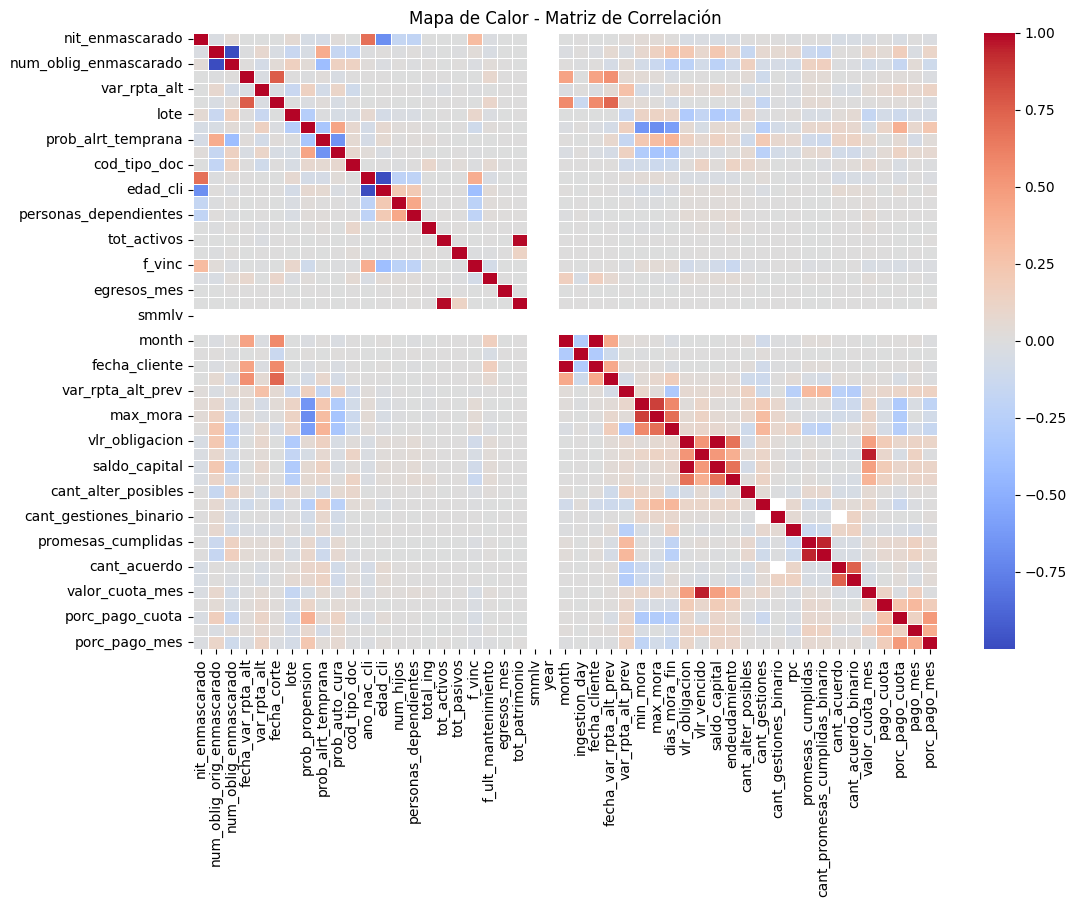

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo variables numéricas para la correlación
numeric_cols = df_final_merge_prev.select_dtypes(include=['int64', 'float64', 'Int64']).columns

# Calcular la matriz de correlación
corr_matrix = df_final_merge_prev[numeric_cols].corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Generar el mapa de calor de correlación
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Calor - Matriz de Correlación")
plt.show()


## Factores que influyen en la aceptación de la opción de pago (var_rpta_alt):

### Gestión de cobranzas: 
Variables como cant_gestiones_binario, cant_promesas_cumplidas_binario y cant_acuerdo_binario tienen una relación positiva con var_rpta_alt, lo que indica que clientes con más interacciones y compromisos previos tienen mayor probabilidad de aceptar una opción de pago.
Historial de pago: pago_mes y porc_pago_mes también muestran cierta correlación con la aceptación, lo que sugiere que quienes han realizado pagos previos tienen más probabilidades de aceptar una alternativa.
Factores de riesgo que pueden impactar la aceptación:

### Altura de mora (dias_mora_fin, max_mora):
Se observa que clientes con mayor mora suelen tener menor propensión a aceptar una opción de pago, lo que podría indicar que esperan otras soluciones o tienen menos capacidad de pago.
### Probabilidad de alerta temprana (prob_alrt_temprana):
Clientes con alta probabilidad de entrar en mora en el futuro podrían estar menos dispuestos a aceptar una alternativa de pago, ya que su situación financiera sigue deteriorándose.
##Variables con menor impacto en la aceptación:

### Datos sociodemográficos:
Variables como edad_cli, total_ing y tot_patrimonio no parecen estar fuertemente correlacionadas con la aceptación de una opción de pago. Esto indica que el comportamiento financiero reciente es más determinante que la capacidad económica declarada.

In [101]:
# Definir las columnas a eliminar basándonos en la redundancia y baja relevancia
columns_to_drop = [
    

    # Texto y categorías de baja relevancia o difíciles de modelar
    "year", "month", "ingestion_day",
    "descripcion_ranking_mejor_ult", "descripcion_ranking_post_ult",
    "desc_alternativa1", "desc_alternativa2", "desc_alternativa3",
    "alter_posible1_2", "alter_posible2_2", "alter_posible3_2",
    "marca_agrupada_rgo", 
    "marca_alternativa", "marca_alternativa_orig",
    "alternativa_aplicada_agr", "marca_alt_rank", "marca_alt_apli",
    "tipo_cli", "ano_nac_cli", "subsector", "act_econom", "f_vinc", "f_ult_mantenimiento", "canal_actualizacion", "nicho",

    "ciiu", "smmlv", "fecha_cliente", "banca", "segmento", "producto_cons", "aplicativo", "fecha_var_rpta_alt_prev",
    "cant_gestiones_binario", "cant_promesas_cumplidas_binario", "cant_acuerdo_binario", "pagos_tanque", "fecha_corte", "porc_pago_mes"
    
]

# Eliminar las columnas definidas
df_cleaned = df_final_merge_prev.drop(columns=columns_to_drop, errors="ignore")

# Mostrar las columnas restantes
df_cleaned


,ID,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt,lote,prob_propension,prob_alrt_temprana,prob_auto_cura,...,cant_gestiones,rpc,promesas_cumplidas,cant_acuerdo,valor_cuota_mes,pago_cuota,porc_pago_cuota,pago_mes,marca_debito_mora,marca_pago
3,12#623302#457040,12,623302,457040,202401,NaN,1,0.421872,0.709632,0.144849,...,54.0,0.0,4,0.0,20629639.83,0.00,0.0,0.0,NO,Cumple compromiso
5,14#209309#873421,14,209309,873421,202310,0.0,1,0.608336,0.553057,0.310533,...,26.0,1.0,0,2.0,2123320.55,0.00,0.0,0.0,NO,Sin pago
13,39#817198#263144,39,817198,263144,202401,NaN,2,0.643880,0.746519,0.106498,...,16.0,1.0,0,6.0,78849.00,80000.00,1.0,0.0,NO,Sin pago
17,77#671692#408650,77,671692,408650,202312,0.0,1,0.567750,0.567563,0.267915,...,10.0,1.0,0,0.0,10122207.57,0.00,0.0,0.0,NO,Sin pago
22,78#144139#943964,78,144139,943964,202401,NaN,2,0.508384,0.547036,0.245836,...,26.0,1.0,0,2.0,150019.64,0.00,0.0,0.0,NO,Sin pago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441354,634678#752966#327376,634678,752966,327376,202312,0.0,1,0.516074,0.677676,0.253602,...,16.0,1.0,0,0.0,484177.98,484177.98,1.0,0.0,NO,Sin pago
441357,634678#752966#327376,634678,752966,327376,202401,NaN,1,0.471828,0.678391,0.243727,...,24.0,1.0,0,0.0,472510.00,0.00,0.0,0.0,NO,Sin pago
441359,634681#335716#744868,634681,335716,744868,202401,NaN,1,0.713458,0.288534,0.506360,...,12.0,1.0,0,0.0,1053571.92,0.00,0.0,0.0,NO,Sin pago
441361,634689#53495#1051458,634689,53495,1051458,202312,1.0,2,0.425151,0.585363,0.182726,...,34.0,1.0,0,4.0,517191.95,0.00,0.0,0.0,NO,Sin pago


In [102]:
# Analizar valores nulos en todas las columnas restantes
missing_values_final = df_cleaned.isnull().sum()
missing_values_final = missing_values_final[missing_values_final > 0].sort_values(ascending=False)

# Mostrar la cantidad de valores nulos por columna si quedan valores faltantes
missing_values_final

tipo_vivienda            68152
nivel_academico          56363
var_rpta_alt             30271
estado_civil              8942
sector                    7070
ocup                      6127
subsegm                   3743
genero_cli                2989
num_hijos                 2985
edad_cli                  2985
personas_dependientes     2985
cant_acuerdo              2503
cant_gestiones            2494
origen_fondos             1311
nombre_dpto_dirp           327
declarante                  46
vlr_obligacion               4
segm                         3
dtype: int64

# Manejo de valores nulos en variables numéricas y categóricas.

In [103]:
# Convertir las columnas 'lote' y 'var_rpta_alt_prev' a tipo object (categóricas)
df_cleaned["lote"] = df_cleaned["lote"].astype("object")
df_cleaned["var_rpta_alt_prev"] = df_cleaned["var_rpta_alt_prev"].astype("object")

# Mostrar los tipos de datos actualizados
df_cleaned.dtypes[["lote", "var_rpta_alt_prev"]]


lote                 object
var_rpta_alt_prev    object
dtype: object

In [104]:
# Manejo de valores nulos en variables numéricas
# Rellenar con la mediana en variables numéricas
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64', 'Int64']).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())

# Manejo de valores nulos en variables categóricas
# Rellenar con 'Desconocido' en variables categóricas
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna("Desconocido")

# Verificar si aún quedan valores nulos después del tratamiento
missing_values = df_cleaned.isnull().sum()

# Mostrar las columnas que aún tengan valores nulos
missing_values[missing_values > 0]


C:\Users\alego\AppData\Local\Temp\ipykernel_17000\1503342959.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna("Desconocido")


Series([], dtype: int64)

# Conjunto de entrenamiento, validación y prueba

In [105]:
# Separar las observaciones con fecha_var_rpta_alt = 202401 en una nueva tabla (OOT) 
df_oot = df_cleaned[df_cleaned["fecha_var_rpta_alt"] == 202401].copy() #DATASET DE EVALUACIÓN

# Eliminar esas observaciones de la base principal (Train)
df_train = df_cleaned[df_cleaned["fecha_var_rpta_alt"] != 202401].copy()

# Mostrar las tablas después de la separación
df_train, df_oot



(                          ID  nit_enmascarado  num_oblig_orig_enmascarado  \
 5           14#209309#873421               14                      209309   
 17          77#671692#408650               77                      671692   
 20          78#220456#862334               78                      220456   
 30         115#307958#775160              115                      307958   
 44         135#832182#248160              135                      832182   
 ...                      ...              ...                         ...   
 441346  634671#493550#586792           634671                      493550   
 441340  634671#493553#586789           634671                      493553   
 441342  634671#493553#586789           634671                      493553   
 441354  634678#752966#327376           634678                      752966   
 441361  634689#53495#1051458           634689                       53495   
 
         num_oblig_enmascarado  fecha_var_rpta_alt  var_rpta_a

# Escalado y normalización de variables numéricas.

In [45]:
# Definir las variables de identificación a excluir
id_columns = ["ID", "nit_enmascarado", "num_oblig_orig_enmascarado", "num_oblig_enmascarado", "fecha_var_rpta_alt"]

# Crear el conjunto de entrenamiento sin variables de identificación
X_train = df_train.drop(columns=id_columns + ["var_rpta_alt"], errors="ignore")

# Separar la variable objetivo
y_train = df_train["var_rpta_alt"]

# Mostrar las dimensiones de los conjuntos de entrenamiento
X_train.shape, y_train.shape




((69576, 49), (69576,))

In [46]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento (70%), validación (15%) y prueba (15%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1765, random_state=42, stratify=y_train_full)

# Mostrar las dimensiones de los conjuntos
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((40106, 49), (8597, 49), (20873, 49), (40106,), (8597,), (20873,))

## Entrenamiento del clasificador

In [53]:
import numpy as np

# Identificar las columnas categóricas y numéricas en el conjunto de entrenamiento
cat_cols = X_train.select_dtypes(include="object").columns.tolist()
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Mostrar las listas de columnas categóricas y numéricas
cat_cols, num_cols


(['ctrl_terc',
  'genero_cli',
  'estado_civil',
  'tipo_vivienda',
  'nivel_academico',
  'ocup',
  'sector',
  'declarante',
  'origen_fondos',
  'cli_actualizado',
  'segm',
  'subsegm',
  'region_of',
  'nombre_dpto_dirp',
  'tipo_var_rpta_alt',
  'producto',
  'rango_mora',
  'marca_debito_mora',
  'marca_pago'],
 ['lote',
  'prob_propension',
  'prob_alrt_temprana',
  'prob_auto_cura',
  'cod_tipo_doc',
  'edad_cli',
  'num_hijos',
  'personas_dependientes',
  'total_ing',
  'tot_activos',
  'tot_pasivos',
  'egresos_mes',
  'tot_patrimonio',
  'var_rpta_alt_prev',
  'min_mora',
  'max_mora',
  'dias_mora_fin',
  'vlr_obligacion',
  'vlr_vencido',
  'saldo_capital',
  'endeudamiento',
  'cant_alter_posibles',
  'cant_gestiones',
  'rpc',
  'promesas_cumplidas',
  'cant_acuerdo',
  'valor_cuota_mes',
  'pago_cuota',
  'porc_pago_cuota',
  'pago_mes'])

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Definir transformación para variables numéricas
numeric_transformer = Pipeline( 
    steps=[("scaler", StandardScaler())]  # Escalamiento de datos numéricos
)

# Definir transformación para variables categóricas
categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]  # Codificación One-Hot con manejo de valores desconocidos
)

# Aplicar diferentes transformaciones a diferentes tipos de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

# Mostrar la estructura del preprocesador
preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['lote', 'prob_propension',
                                  'prob_alrt_temprana', 'prob_auto_cura',
                                  'cod_tipo_doc', 'edad_cli', 'num_hijos',
                                  'personas_dependientes', 'total_ing',
                                  'tot_activos', 'tot_pasivos', 'egresos_mes',
                                  'tot_patrimonio', 'var_rpta_alt_prev',
                                  'min_mora', 'max_mora', 'dias_mora_fin',
                                  'vlr_oblig...
                                  'porc_pago_cuota', 'pago_mes']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ctrl_terc', 'genero_cli', 'estado_civil',
                                  'tipo_vivienda', 'nivel_academico', 'ocup',
                                  'sector', 'declarante', 'origen_fondos',
                                  'cli_actualizado', 'segm', 'subsegm',
                                  'region_of', 'nombre_dpto_dirp',
                                  'tipo_var_rpta_alt', 'producto', 'rango_mora',
                                  'marca_debito_mora', 'marca_pago'])])

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Lista de valores de k a probar en KNN
n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15]
accuracy = []

# Iterar sobre diferentes valores de k en el clasificador KNN
for k in n_neighbors:
    clf = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors=k))])

    # Entrenar el clasificador con los datos de entrenamiento
    clf.fit(X_train, y_train)

    # Evaluar el rendimiento del clasificador en los datos de validación
    accuracy.append(clf.score(X_val, y_val))

# Mostrar la precisión obtenida para cada valor de k
list(zip(n_neighbors, accuracy))


[(1, 0.6132371757589857),
 (3, 0.6420844480632779),
 (5, 0.6529021751773875),
 (7, 0.6589507967895778),
 (9, 0.6673258113295336),
 (11, 0.6733744329417238),
 (13, 0.6753518669303246),
 (15, 0.6758171455158777)]

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo Random Forest dentro del pipeline
rf_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenar el modelo con los datos de entrenamiento
rf_clf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
rf_test_accuracy = rf_clf.score(X_test, y_test)

# Mostrar la tasa de acierto en el conjunto de prueba
print(f"La tasa de acierto del Random Forest en el conjunto de test es {rf_test_accuracy:.2f}")


La tasa de acierto del Random Forest en el conjunto de test es 0.71


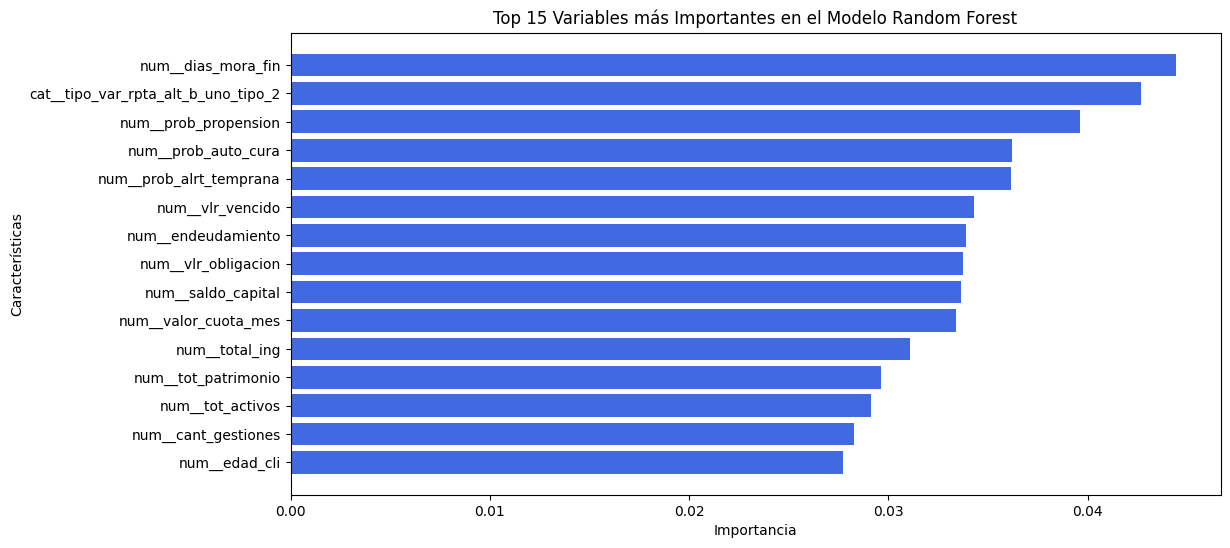

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Extraer la importancia de las características del modelo Random Forest
feature_importances = rf_clf.named_steps["classifier"].feature_importances_

# Obtener los nombres de las características después del preprocesamiento
feature_names = preprocessor.get_feature_names_out()

# Ordenar las características por importancia
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

# Visualizar la importancia de las variables
plt.figure(figsize=(12, 6))
plt.barh(sorted_features[:15], sorted_importances[:15], color="royalblue")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Top 15 Variables más Importantes en el Modelo Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [106]:
df_oot

,ID,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt,lote,prob_propension,prob_alrt_temprana,prob_auto_cura,...,cant_gestiones,rpc,promesas_cumplidas,cant_acuerdo,valor_cuota_mes,pago_cuota,porc_pago_cuota,pago_mes,marca_debito_mora,marca_pago
3,12#623302#457040,12,623302,457040,202401,0.0,1,0.421872,0.709632,0.144849,...,54.0,0.0,4,0.0,20629639.83,0.0,0.000000,0.0,NO,Cumple compromiso
13,39#817198#263144,39,817198,263144,202401,0.0,2,0.643880,0.746519,0.106498,...,16.0,1.0,0,6.0,78849.00,80000.0,1.000000,0.0,NO,Sin pago
22,78#144139#943964,78,144139,943964,202401,0.0,2,0.508384,0.547036,0.245836,...,26.0,1.0,0,2.0,150019.64,0.0,0.000000,0.0,NO,Sin pago
24,85#952231#128111,85,952231,128111,202401,0.0,2,0.824770,0.463806,0.419009,...,96.0,1.0,0,12.0,60667.00,60667.0,1.000000,0.0,NO,Sin pago
28,111#833690#246652,111,833690,246652,202401,0.0,1,0.771329,0.672616,0.410026,...,8.0,1.0,0,0.0,412638.22,0.0,0.000000,0.0,NO,Sin pago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441335,634670#831668#248674,634670,831668,248674,202401,0.0,2,0.361389,0.676341,0.208215,...,32.0,1.0,0,0.0,1271548.00,400.0,0.000315,0.0,NO,Sin pago
441347,634671#493550#586792,634671,493550,586792,202401,0.0,3,0.381079,0.748362,0.207532,...,38.0,1.0,0,0.0,62358.00,0.0,0.000000,0.0,NO,Sin pago
441357,634678#752966#327376,634678,752966,327376,202401,0.0,1,0.471828,0.678391,0.243727,...,24.0,1.0,0,0.0,472510.00,0.0,0.000000,0.0,NO,Sin pago
441359,634681#335716#744868,634681,335716,744868,202401,0.0,1,0.713458,0.288534,0.506360,...,12.0,1.0,0,0.0,1053571.92,0.0,0.000000,0.0,NO,Sin pago


In [109]:
# Realizar predicciones en el conjunto OOT
id_columns = ["ID", "nit_enmascarado", "num_oblig_orig_enmascarado", "num_oblig_enmascarado", "fecha_var_rpta_alt"]
X_oot = df_oot.drop(columns=id_columns + ["var_rpta_alt"], errors="ignore")
df_oot["var_rpta_alt_pred"] = rf_clf.predict(X_oot)
df_oot["propension"] = rf_clf.predict_proba(X_oot)[:, 1]  # Probabilidad de ser 1


In [110]:
file_path_new = "data/sample_submission.csv"
df_sub = pd.read_csv(file_path_new)

df_final = df_sub.merge(
    df_oot,
    on=["ID"],
    how="left"
)
df_final

,ID,var_rpta_alt_x,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt_y,lote,prob_propension,prob_alrt_temprana,...,promesas_cumplidas,cant_acuerdo,valor_cuota_mes,pago_cuota,porc_pago_cuota,pago_mes,marca_debito_mora,marca_pago,var_rpta_alt_pred,propension
0,243031#516680#563662,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,401665#347465#733256,0,401665.0,347465.0,733256.0,202401.0,0.0,1.0,0.620468,0.547141,...,0,0.0,332021.18,0.0,0.0,0.0,NO,Sin pago,0.0,0.30
2,391362#511160#569182,0,391362.0,511160.0,569182.0,202401.0,0.0,1.0,0.580248,0.356073,...,0,0.0,2538229.28,0.0,0.0,0.0,NO,Sin pago,0.0,0.29
3,169789#441265#639051,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,341343#76559#1028512,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112544,313043#514#1004440,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112545,312047#31293#884339,1,312047.0,31293.0,884339.0,202401.0,0.0,1.0,0.797197,0.898357,...,0,4.0,0.00,0.0,0.0,0.0,NO,Sin pago,0.0,0.04
112546,317363#161838#938727,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112547,49997#9246#1077445,0,49997.0,9246.0,1077445.0,202401.0,0.0,3.0,0.098865,0.548508,...,0,2.0,1255818.77,0.0,0.0,0.0,NO,Sin pago,0.0,0.23


In [115]:
subir = df_final[["ID", "var_rpta_alt_pred"]]
subir.to_csv("subir.csv", index=False)

In [116]:
enviar = df_final[["ID", "var_rpta_alt_pred", "propension"]]
subir.to_csv("enviar.csv", index=False)